In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as plt

X_train = pd.read_csv('../data/X_train.csv')
X_test = pd.read_csv('../data/X_test.csv')
Y_train = pd.read_csv('../data/Y_train.csv')
Y_test = pd.read_csv('../data/Y_test.csv')

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((2341, 142), (586, 142), (2341, 1), (586, 1))

# Random forest regressor

In [2]:
rndF = RandomForestRegressor()
selector_FromModel = SelectFromModel(rndF, threshold=1e-4).fit(X_train, Y_train.values.ravel())

X_train_FromModel = X_train[selector_FromModel.get_feature_names_out()]
X_test_FromModel = X_test[selector_FromModel.get_feature_names_out()]

In [3]:
selector_RFECV = RFECV(rndF, n_jobs = 6, cv=5, min_features_to_select = 5, step=1, scoring='neg_mean_squared_error', verbose=2).fit(X_train, Y_train.values.ravel())

X_train_RFECV = X_train[selector_RFECV.get_feature_names_out()]
X_test_RFECV = X_test[selector_RFECV.get_feature_names_out()]

Fitting estimator with 142 features.
Fitting estimator with 141 features.
Fitting estimator with 140 features.
Fitting estimator with 139 features.
Fitting estimator with 138 features.
Fitting estimator with 137 features.
Fitting estimator with 136 features.
Fitting estimator with 135 features.
Fitting estimator with 134 features.
Fitting estimator with 133 features.
Fitting estimator with 132 features.
Fitting estimator with 131 features.
Fitting estimator with 130 features.
Fitting estimator with 129 features.
Fitting estimator with 128 features.
Fitting estimator with 127 features.
Fitting estimator with 126 features.
Fitting estimator with 125 features.
Fitting estimator with 124 features.
Fitting estimator with 123 features.
Fitting estimator with 122 features.
Fitting estimator with 121 features.
Fitting estimator with 120 features.
Fitting estimator with 119 features.
Fitting estimator with 118 features.
Fitting estimator with 117 features.
Fitting estimator with 116 features.
F

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
FromModel:
Best Score: 0.884
Best Params:  {'bootstrap': True, 'criterion': 'friedman_mse', 'max_depth': 60, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 120, 'random_state': 200}
Test MSE: 0.013
Test R^2: 0.930


Text(0, 0.5, 'Sale_Price')

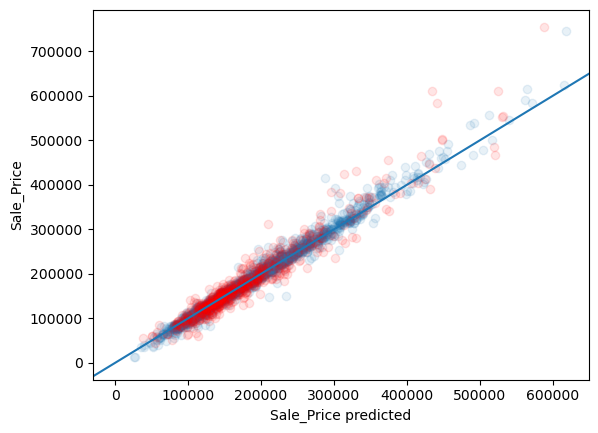

In [4]:
parameters = {
    'bootstrap': [True, False],
    'criterion': ["friedman_mse"],
    'max_depth': [20, 60, 100, None],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [120,150,170],
    'random_state': [100, 200, 300]
}
tuned_model_1 = GridSearchCV(rndF, parameters, cv=5, n_jobs = 6, verbose=2)
tuned_model_1.fit(X_train_FromModel, Y_train.values.ravel())

print("FromModel:")
print ("Best Score: {:.3f}".format(tuned_model_1.best_score_) )
print ("Best Params: ", tuned_model_1.best_params_)

train_pre = tuned_model_1.predict(X_train_FromModel)
test_pre = tuned_model_1.predict(X_test_FromModel)

print("Test MSE: {:.3f}".format((mean_squared_error(y_true=(Y_test),
                                                    y_pred=(test_pre)))))

print("Test R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_test),
                                          y_pred=np.exp(test_pre)))))

fig, axs = plt.subplots()

axs.plot(np.exp(train_pre), np.exp(Y_train), 'o', alpha=0.1)
axs.plot(np.exp(test_pre), np.exp(Y_test), 'o', alpha=0.1, c="red")
axs.axline((0, 0), slope=1)
axs.set_xlabel('Sale_Price predicted')
axs.set_ylabel('Sale_Price')


{'bootstrap': True, 'criterion': 'friedman_mse', 'max_depth': 60, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 120, 'random_state': 200}

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
RFECV:
Best Score: 0.885
Best Params:  {'bootstrap': True, 'criterion': 'friedman_mse', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 120, 'random_state': 200}
Test MSE: 0.013
Test R^2: 0.931


Text(0, 0.5, 'Sale_Price')

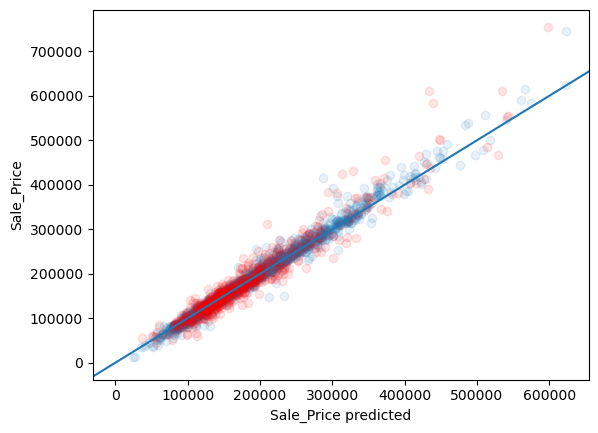

In [5]:
tuned_model_2 = GridSearchCV(rndF, parameters, cv=5, n_jobs = 6, verbose=2)
tuned_model_2.fit(X_train_RFECV, Y_train.values.ravel())

print("RFECV:")
print ("Best Score: {:.3f}".format(tuned_model_2.best_score_) )
print ("Best Params: ", tuned_model_2.best_params_)

train_pre = tuned_model_2.predict(X_train_RFECV)
test_pre = tuned_model_2.predict(X_test_RFECV)

print("Test MSE: {:.3f}".format((mean_squared_error(y_true=(Y_test),
                                                    y_pred=(test_pre)))))

print("Test R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_test),
                                          y_pred=np.exp(test_pre)))))

fig, axs = plt.subplots()

axs.plot(np.exp(train_pre), np.exp(Y_train), 'o', alpha=0.1)
axs.plot(np.exp(test_pre), np.exp(Y_test), 'o', alpha=0.1, c="red")
axs.axline((0, 0), slope=1)
axs.set_xlabel('Sale_Price predicted')
axs.set_ylabel('Sale_Price')